In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chess
import chess.pgn
import chess.polyglot
import re
from stockfish import Stockfish

In [2]:
data = pd.read_csv("data/chess.csv")
df = data
data.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


In [3]:
data.pgn.iloc[0]

'[Event "Enjoyable games 2 - Round 1"]\n[Site "Chess.com"]\n[Date "2013.01.30"]\n[Round "-"]\n[White "-Amos-"]\n[Black "miniman2804"]\n[Result "1-0"]\n[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]\n[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]\n[Timezone "UTC"]\n[ECO "E22"]\n[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]\n[UTCDate "2013.01.30"]\n[UTCTime "16:35:14"]\n[WhiteElo "1708"]\n[BlackElo "1608"]\n[TimeControl "1/259200"]\n[Termination "-Amos- won by checkmate"]\n[StartTime "16:35:14"]\n[EndDate "2013.02.01"]\n[EndTime "18:14:48"]\n[Link "https://www.chess.com/game/daily/64629816"]\n\n1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0\n'

In [4]:
data.pgn.iloc[0].split("\n")[-2]

'1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0'

In [5]:
data.pgn.iloc[-1].split("\n")[-2]

'1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:56.3]} 2. f4 {[%clk 0:04:58.6]} 2... d6 {[%clk 0:04:55.3]} 3. fxe5 {[%clk 0:04:55.3]} 3... dxe5 {[%clk 0:04:53.4]} 4. Nf3 {[%clk 0:04:54.7]} 4... Bd6 {[%clk 0:04:48.6]} 5. d4 {[%clk 0:04:48.4]} 5... c5 {[%clk 0:04:47.9]} 6. dxe5 {[%clk 0:04:45.6]} 6... Bc7 {[%clk 0:04:43.4]} 7. Bc4 {[%clk 0:04:42.7]} 7... Qxd1+ {[%clk 0:04:40.7]} 8. Kxd1 {[%clk 0:04:40.3]} 8... Ne7 {[%clk 0:04:35.4]} 9. Be3 {[%clk 0:04:38.6]} 9... O-O {[%clk 0:04:33.2]} 10. Bxc5 {[%clk 0:04:35.1]} 10... Rd8+ {[%clk 0:04:22.5]} 11. Nbd2 {[%clk 0:04:27.3]} 11... Nec6 {[%clk 0:04:14.7]} 12. Ke2 {[%clk 0:04:18.6]} 12... Bg4 {[%clk 0:04:09.4]} 13. h3 {[%clk 0:04:13.8]} 13... Bxf3+ {[%clk 0:04:07.2]} 14. gxf3 {[%clk 0:04:12.4]} 14... Nxe5 {[%clk 0:04:06.4]} 15. Bb3 {[%clk 0:04:04.4]} 15... b6 {[%clk 0:04:03.2]} 16. Be3 {[%clk 0:04:00.2]} 16... Nbc6 {[%clk 0:03:58]} 17. Nc4 {[%clk 0:03:47.5]} 17... Nxc4 {[%clk 0:03:55.2]} 18. Bxc4 {[%clk 0:03:46.2]} 18... Na5 {[%clk 0:03:51.4]} 19. 

In [6]:
def extract_move(pgn):
    if(pgn.find('{[')):
        original_list = pgn.split("\n")[-2].split()
        removed_list = pgn.split("\n")[-2].split()[::3]
        new_list = [x for x in original_list if x not in removed_list]
        return new_list
    else:
        return pgn.split("\n")[-2].split()[1::4]

In [7]:
df['Moves'] = df['pgn'].apply(extract_move)

In [8]:
df['Moves'][0][0:10]
#chess.Board(df['fen'][0])

['d4', 'Nf6', 'c4', 'e6', 'Nc3', 'Bb4', 'Qb3', 'Bxc3+', 'Qxc3', 'O-O']

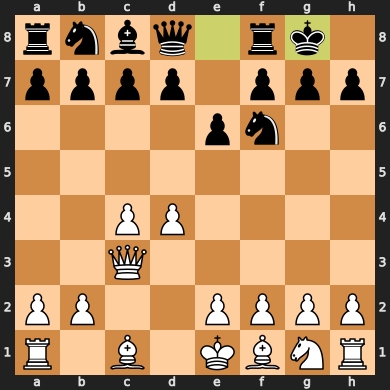

In [9]:
board = chess.Board()
for x in df["Moves"][0][0:10]:
    board.push_san(x)
board

In [10]:
opening = data.pgn.iloc[0].partition("openings/")[2].partition('"]\n')[0] #.replace("-", " ")
opening

'Nimzo-Indian-Defense-Spielmann-Variation'

In [11]:
import requests
from bs4 import BeautifulSoup

In [12]:
for x in range(10):
    w_rslt = data.white_result[x]
    b_rslt = data.black_result[x]
    opening = data.pgn.iloc[x].partition("openings/")[2].partition('"]\n')[0] #.replace("-", " ")
    if (opening != ""):
        opening_url = f"https://www.chess.com/openings/{opening}"
        response = requests.get(opening_url)
        soup = BeautifulSoup(response.text, "html.parser")
        fen_script = soup.find_all("script")[-4].text
        f = re.search('"fen":"(.+?)"', fen_script)
        if f:
            fen = f.group(1)
        print("FEN for " + opening + ": " + fen + "\n")
        print(chess.Board(fen), "\n")
        print("White: " + w_rslt + ", Black: " + b_rslt + "\n")
    else:
        print("No opening for game", (x+1), "\n")

#print(f"FEN for {opening_name}: {fen}")
# want to get proper chess boards showing up so can see difference between black and white!!

FEN for Nimzo-Indian-Defense-Spielmann-Variation: rnbqk2r/pppp1ppp/4pn2/8/1bPP4/1QN5/PP2PPPP/R1B1KBNR b KQkq - 3 4

r n b q k . . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. b P P . . . .
. Q N . . . . .
P P . . P P P P
R . B . K B N R 

White: win, Black: checkmated

FEN for Giuoco-Piano-Game-Main-Line: r1bqk1nr/pppp1ppp/2n5/2b1p3/2B1P3/2P2N2/PP1P1PPP/RNBQK2R b KQkq - 0 4

r . b q k . n r
p p p p . p p p
. . n . . . . .
. . b . p . . .
. . B . P . . .
. . P . . N . .
P P . P . P P P
R N B Q K . . R 

White: win, Black: resigned

FEN for Queens-Pawn-Opening-1...d5-2.e3: rnbqkbnr/ppp1pppp/8/3p4/3P4/4P3/PPP2PPP/RNBQKBNR b KQkq - 0 2

r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . . . P . . .
P P P . . P P P
R N B Q K B N R 

White: win, Black: resigned

FEN for Sicilian-Defense-Snyder-Variation: rnbqkbnr/pp1ppppp/8/2p5/4P3/1P6/P1PP1PPP/RNBQKBNR b KQkq - 0 2

r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . . . P . . .
. P . 

In [13]:
# pawn heatmap after x moves
# or other pieces like bishop and knight
# most moved or attacked or defended piece?
# can we use machine learning to see if a computer can predict the winner based on the opening?

In [14]:
opening = data.pgn.iloc[6].partition("openings/")[2].partition('"]\n')[0] #.replace("-", " ")
print(opening == "")
opening_url = f"https://www.chess.com/openings/{opening}"
response = requests.get(opening_url)
soup = BeautifulSoup(response.text, "html.parser")
#fen_script = soup.find_all("script")[-4].text
#f = re.search('"fen":"(.+?)"', fen_script)
#if f:
#    fen = f.group(1)
#print("fen for " + opening + ": " + fen)
#chess.Board(fen)

True


In [15]:
print(data.pgn.iloc[0])

[Event "Enjoyable games 2 - Round 1"]
[Site "Chess.com"]
[Date "2013.01.30"]
[Round "-"]
[White "-Amos-"]
[Black "miniman2804"]
[Result "1-0"]
[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]
[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]
[Timezone "UTC"]
[ECO "E22"]
[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]
[UTCDate "2013.01.30"]
[UTCTime "16:35:14"]
[WhiteElo "1708"]
[BlackElo "1608"]
[TimeControl "1/259200"]
[Termination "-Amos- won by checkmate"]
[StartTime "16:35:14"]
[EndDate "2013.02.01"]
[EndTime "18:14:48"]
[Link "https://www.chess.com/game/daily/64629816"]

1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0



In [18]:
diff_openings = []
all_openings = []

for i in range(len(data)):
    opening = data.pgn.iloc[i].partition("openings/")[2].partition('"]\n')[0]
    if opening != "":
        all_openings.append(opening)
        if opening not in diff_openings:
            diff_openings.append(opening)
        
for i in range(len(diff_openings)):
    print("Count for opening ", diff_openings[i], ": ", all_openings.count(diff_openings[i]))


Count for opening  Nimzo-Indian-Defense-Spielmann-Variation :  2
Count for opening  Giuoco-Piano-Game-Main-Line :  28
Count for opening  Queens-Pawn-Opening-1...d5-2.e3 :  782
Count for opening  Sicilian-Defense-Snyder-Variation :  50
Count for opening  Queens-Pawn-Opening-Horwitz-Defense-2.c4 :  205
Count for opening  French-Defense-Advance-Variation-3...c5 :  21
Count for opening  Queens-Pawn-Opening :  211
Count for opening  English-Opening-Anglo-Indian-Kings-Knight-Variation :  26
Count for opening  Sicilian-Defense-Staunton-Cochrane-Variation :  86
Count for opening  Reti-Opening-1...Nf6-2.Nc3 :  21
Count for opening  Sicilian-Defense-Bowdler-Attack :  849
Count for opening  Benko-Gambit :  11
Count for opening  Sicilian-Defense-McDonnell-Attack-2...Nc6-3.Nf3 :  55
Count for opening  Sicilian-Defense-Pin-Variation :  56
Count for opening  Queens-Gambit-Declined-Queens-Knight-Variation-3...Nf6 :  170
Count for opening  Slav-Defense-3.Nc3 :  182
Count for opening  Indian-Game-East-I

Count for opening  Kings-Fianchetto-Opening-Indian-Defense :  59
Count for opening  Kings-Fianchetto-Opening-1...d5-2.Bg2 :  118
Count for opening  Reti-Opening-Queens-Gambit-Invitation :  90
Count for opening  Ruy-Lopez-Opening-Old-Steinitz-Defense-4.d4-exd4 :  4
Count for opening  Scandinavian-Defense-Mieses-Kotrc-Variation-3.Nc3-Qd8 :  438
Count for opening  Pirc-Defense-2.d4-Nf6-3.Nc3 :  31
Count for opening  Queens-Pawn-Opening-Mikenas-Defense-2.d5 :  27
Count for opening  Birds-Opening-1...f5-2.d4 :  9
Count for opening  Birds-Opening :  210
Count for opening  Mieses-Opening :  335
Count for opening  Queens-Pawn-Opening-Mason-Attack :  45
Count for opening  Barnes-Opening-1...f5-2.e4 :  4
Count for opening  Ruy-Lopez-Opening-Morphy-Defense-Exchange-Variation-4...dxc6 :  42
Count for opening  Italian-Game-Two-Knights-Defense :  115
Count for opening  Giuoco-Piano-Game-4.O-O-Nf6 :  154
Count for opening  Nimzowitsch-Defense :  175
Count for opening  Van-Geet-Opening :  65
Count for

Count for opening  French-Defense-Knight-Variation-2...d5-3.e5-c5 :  21
Count for opening  Bishops-Opening-Boi-Stein-Gambit :  2
Count for opening  Modern-Defense-with-1-e4-2.Nc3-Bg7 :  40
Count for opening  Scotch-Game-3...exd4 :  33
Count for opening  Giuoco-Piano-Game-Main-Line-La-Bourdonnais-Variation :  23
Count for opening  Ruy-Lopez-Opening-Classical-Defense-4.O-O-Nf6 :  14
Count for opening  Queens-Gambit-Declined-Albin-Countergambit-3.dxe5-d4-4.a3 :  2
Count for opening  Kings-Pawn-Opening-Kings-Knight-McConnell-Defense-3.Bc4 :  160
Count for opening  Kings-Pawn-Opening-Latvian-Gambit-Accepted :  36
Count for opening  Alekhines-Defense-Krejcik-Variation-2...Nxe4 :  18
Count for opening  English-Opening-Anglo-Scandinavian-Defense :  58
Count for opening  Vant-Kruijs-Opening-1...e5-2.Bc4 :  61
Count for opening  Kings-Fianchetto-Opening-Reversed-Alekhine-Variation :  26
Count for opening  Queens-Gambit-Declined-Albin-Countergambit-3.dxe5-d4-4.Nf3 :  6
Count for opening  Pirc-Def

Count for opening  Kings-Indian-Defense-Normal-Variation-4.Nf3 :  20
Count for opening  French-Defense-Kings-Indian-Attack-2...d5-3.Nd2-Nf6 :  2
Count for opening  Reti-Opening-Kings-Indian-Attack-Symmetrical-Defense...4.O-O-O-O-5.d3-d6 :  3
Count for opening  Kings-Indian-Defense-Four-Pawns-Attack-5...O-O-6.Be2 :  1
Count for opening  Sicilian-Defense-Open-Najdorf-Variation :  31
Count for opening  English-Opening-Anglo-Indian-Queens-Knight-Variation-2...g6-3.g3 :  11
Count for opening  Caro-Kann-Defense-2.d4-d5-3.Nc3 :  37
Count for opening  Sicilian-Defense-Taimanov-Bastrikov-Variation-6.Be2-a6 :  2
Count for opening  Four-Knights-Game-Gunsberg-Variation :  6
Count for opening  Kings-Pawn-Opening-Kings-Knight-Gunderam-Gambit :  33
Count for opening  Ruy-Lopez-Opening-Cozio-Defense :  32
Count for opening  Italian-Game-Two-Knights-Defense-4.O-O :  60
Count for opening  Grunfeld-Defense-Burille-Variation-5...c5 :  1
Count for opening  Sicilian-Defense-Canal-Attack-3...Nc6 :  41
Count 

Count for opening  Kings-Indian-Defense-Orthodox-Variation-6...c5-7.d5 :  1
Count for opening  Kings-Indian-Defense-Four-Pawns-Attack-5...O-O-6.Nf3-Bg4 :  2
Count for opening  Benoni-Defense-Modern-Pawn-Storm-Variation :  1
Count for opening  Old-Benoni-Defense-2.d5-e5 :  9
Count for opening  Grunfeld-Defense-Exchange-Modern-Exchange-Variation-7...c5-8.Be2 :  2
Count for opening  Queens-Gambit-Declined-Semi-Slav-Defense-Accelerated-Move-Order-4.Nf3 :  8
Count for opening  Kings-Indian-Defense-Normal-Variation-4.e4 :  2
Count for opening  Queens-Gambit-Declined-Albin-Fianchetto-Variation-5...Nge7 :  1
Count for opening  Queens-Gambit-Declined-Three-Knights-Variation-4...Be7-5.cxd5 :  2
Count for opening  Queens-Pawn-Opening-Pseudo-Catalan-Variation :  17
Count for opening  Queens-Gambit-Declined-Exchange-Positional-Line-5...Be7-6.Nf3 :  2
Count for opening  Ruy-Lopez-Opening-Classical-Central-Variation :  19
Count for opening  Four-Knights-Game-Halloween-Gambit...8.e5-Ng8-9.d6-cxd6-10.e

Count for opening  Ruy-Lopez-Opening-Nurnberg-Variation :  12
Count for opening  English-Opening-Agincourt-Defense-2.g3-d5-3.Bg2 :  3
Count for opening  Nimzo-Indian-Defense-Three-Knights-Variation :  4
Count for opening  French-Defense-Advance-Paulsen-Attack :  9
Count for opening  Slav-Defense-Modern-Three-Knights-Variation :  6
Count for opening  French-Defense-Tarrasch-Open-Delayed-Exchange-Variation-5.Bb5-Nc6 :  1
Count for opening  Queens-Gambit-Accepted-Rosenthal-Variation :  7
Count for opening  Dutch-Defense-Classical-Variation-3.Nf3-Nf6 :  2
Count for opening  French-Defense-Marshall-Variation :  12
Count for opening  Benoni-Defense-Hromadka-System :  1
Count for opening  Slav-Defense-Modern-Triangle-System :  7
Count for opening  French-Defense-Exchange-Svenonius-Variation :  6
Count for opening  French-Defense-Exchange-Variation-3...exd5-4.Nf3-Nf6-5.Bd3 :  7
Count for opening  French-Defense-Exchange-Variation-3...exd5-4.Nf3-Nf6 :  8
Count for opening  Philidor-Defense-Phil

Count for opening  Kings-Pawn-Opening-Leonardis-Radisch-Gambit :  2
Count for opening  Scandinavian-Defense-Blackburne-Kloosterboer-Gambit-3.dxc6-e5 :  3
Count for opening  Scandinavian-Defense-Modern-Icelandic-Palme-Gambit-4.dxe6-Bxe6-5.Nf3 :  5
Count for opening  Sicilian-Defense-Polish-Gambit :  2
Count for opening  Scotch-Game-Scotch-Gambit-Dubois-Reti-Advance-Kingside-Variation :  5
Count for opening  Giuoco-Piano-Game-Center-Attack-5...exd4 :  4
Count for opening  Queens-Pawn-Opening-Blackmar-Diemer-Gambit :  5
Count for opening  Trompowsky-Attack-Raptor-Variation :  1
Count for opening  Kings-Pawn-Opening-Latvian-Mayet-Polerio-Svedenborg-Variation :  4
Count for opening  Indian-Game-Maddigan-Gambit :  2
Count for opening  Kings-Indian-Defense-3.Nc3 :  16
Count for opening  Indian-Game-Deferred-Blackmar-Diemer-Gambit :  2
Count for opening  Alekhines-Defense-Exchange-Variation-5...cxd6 :  2
Count for opening  Alekhines-Defense-Normal-Variation-3.d4-d6-4.c4 :  1
Count for opening 

Count for opening  Modern-Defense-Standard-Line-3...c6 :  4
Count for opening  Queens-Gambit-Declined-Marshall-Defense-3.cxd5-Nxd5 :  3
Count for opening  Kings-Fianchetto-Opening-Lasker-Simul-Special-Variation-2.Nf3 :  1
Count for opening  Ruy-Lopez-Opening-Retreat-Variation :  1
Count for opening  Polish-Opening-Grigorian-Variation :  4
Count for opening  Barnes-Opening-1...e5-2.g4 :  1
Count for opening  Scotch-Game-Schmidt-Mieses-Variation :  4
Count for opening  Dutch-Defense-Staunton-Gambit :  5
Count for opening  Englund-Gambit-Zilbermints-Gambit-with-3-h6 :  1
Count for opening  Queens-Pawn-Opening-Mikenas-Defense-2.Bg5 :  1
Count for opening  Kings-Fianchetto-Opening-1...d5-2.Bg2-e5-3.c4 :  5
Count for opening  Polish-Opening-Kings-Indian-Defense :  2
Count for opening  English-Opening-Mikenas-Carls-Variation :  2
Count for opening  Sicilian-Defense-Open-Najdorf-Variation-6.Bg5-e6-7.f4-Nbd7-8.Bc4 :  1
Count for opening  Sicilian-Defense-Open-Najdorf-Variation-6.Bg5-Nbd7-7.Bc4-

Count for opening  Nimzo-Indian-Defense-Samisch-Variation-5...d5 :  3
Count for opening  English-Opening-Agincourt-Defense-2.Nf3-d5-3.g3 :  3
Count for opening  Queens-Gambit-Declined-Chigorin-Janowski-Variation-4...Nf6 :  1
Count for opening  Sicilian-Defense-Open-Accelerated-Dragon-Modern-Variation...7.Bc4-Qa5-8.O-O-O-O :  1
Count for opening  Sicilian-Defense-Open-Kupreichik-Variation :  1
Count for opening  Sicilian-Defense-Open-Prins-Variation-5...e5-6.Nb3 :  2
Count for opening  Sicilian-Defense-Canal-Attack-3...Nd7-4.O-O-Nf6-5.Re1 :  1
Count for opening  Reti-Opening-Nimzowitsch-Larsen-Attack-2...Nf6-3.Bb2-c5 :  1
Count for opening  Sicilian-Defense-Open-Accelerated-Dragon-Modern-Variation-5...Bg7-6.Nde2 :  1
Count for opening  Sicilian-Defense-Alapin-Variation-2...d5-3.exd5 :  2
Count for opening  Sicilian-Defense-Open-Prins-Variation-5...a6 :  1
Count for opening  Sicilian-Defense-Grand-Prix-Attack...4.Nf3-Bg7-5.Bb5-Nd4-6.O-O :  1
Count for opening  Bogo-Indian-Defense-Nimzowi

Count for opening  Kings-Gambit-Accepted-Bishops-Gambit-Anderssen-Defense :  1
Count for opening  Kings-Gambit-Accepted-Muzio-Sarratt-Defense-7.e5-Qxe5 :  1
Count for opening  Modern-Defense-Wind-Gambit :  1
Count for opening  Sicilian-Defense-Open-Lowenthal-Kalashnikov-Variation-6.N1c3 :  2
Count for opening  Kings-Indian-Defense-Larsen-Variation :  2
Count for opening  English-Opening-Fianchetto-Ultra-Symmetrical-Line-5.d3 :  1
Count for opening  Giuoco-Piano-Game-Center-Attack...7.Bd2-Nxe4-8.Bxb4-Nxb4 :  5
Count for opening  Kings-Indian-Defense-Orthodox-Variation :  3
Count for opening  Sicilian-Defense-Closed-Fianchetto-Variation-3...g6-4.Bg2-Bg7-5.f4 :  1
Count for opening  Sicilian-Defense-Taimanov-Variation-5.Nc3-Nf6-6.Be3-Bb4 :  1
Count for opening  Alekhines-Defense-Modern-Larsen-Haakert-Variation :  2
Count for opening  Kings-Indian-Defense-Samisch-Gambit-Accepted-7...dxc5-8.Qxd8 :  1
Count for opening  Kings-Indian-Defense-Normal-Variation-4.e4-d6-5.Nf3-Nbd7 :  1
Count for 

Count for opening  Sicilian-Defense-Nyezhmetdinov-Rossolimo-Attack-3...e6-4.O-O-Nge7 :  1
Count for opening  Four-Knights-Game-Scotch-Variation-Accepted :  1
Count for opening  French-Defense-Winawer-Delayed-Exchange-Variation-4...exd5 :  3
Count for opening  Tarrasch-Defense-4.Nf3-cxd4-5.Nxd4 :  1
Count for opening  Modern-Defense-with-1-e4-2.d4-Nh6 :  1
Count for opening  Kings-Pawn-Opening-Kings-Knight-Pachman-Wing-Gambit :  1
Count for opening  Queens-Pawn-Opening-St-George-Defense-2.c4-b5-3.e4 :  2
Count for opening  Ruy-Lopez-Opening-Rotary-Albany-Gambit :  1
Count for opening  Kings-Indian-Attack...3.Bg2-e5-4.d3-Nf6-5.O-O :  1
Count for opening  Grob-Opening-Grob-Gambit-2...Bxg4 :  3
Count for opening  Giuoco-Piano-Game-Evans-Accepted-Pierce-Anderssen-Defense :  2
Count for opening  Sicilian-Defense-Smith-Morra-Gambit-Accepted-4.Nxc3-e6-5.Bc4 :  3
Count for opening  Four-Knights-Game-Scotch-Oxford-Gambit :  1
Count for opening  Old-Indian-Defense-Czech-Variation-4.Nf3 :  1
Count

Count for opening  Sicilian-Defense-Smith-Morra-Accepted-Morphy-Defense :  1
Count for opening  French-Defense-Tarrasch-Closed-4.e5-Ne4 :  1
Count for opening  Sicilian-Defense-Smith-Morra-Accepted-Fianchetto-Defense-with-5-g6 :  1
Count for opening  French-Defense-Tarrasch-Closed-4.e5 :  1
Count for opening  Sicilian-Defense-Smith-Morra-Accepted-Scheveningen-Formation-7.O-O :  1
Count for opening  Nimzowitsch-Defense-Kennedy-Variation-3.dxe5-Nxe5 :  2
Count for opening  Sicilian-Defense-Open-Najdorf-English-Attack...8.f3-Be7-9.Qd2-Nbd7 :  1
Count for opening  Sicilian-Defense-Smith-Morra-Accepted-Scheveningen-Formation-7.O-O-a6-8.Qe2 :  1
Count for opening  French-Defense-Tarrasch-Modern-System-4.Ngf3 :  1
Count for opening  Kings-Pawn-Opening-Latvian-Accepted-Fraser-Defense :  1
Count for opening  Alekhines-Defense-Modern-Larsen-Variation-5.Nxe5 :  1
Count for opening  Alekhines-Defense-Modern-Larsen-Variation :  1
Count for opening  English-Opening-Anglo-Indian-Anglo-Grunfeld-Defens

In [19]:
df.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,Moves
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...","[d4, Nf6, c4, e6, Nc3, Bb4, Qb3, Bxc3+, Qxc3, ..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...","[e4, e5, Nf3, Nc6, Bc4, Bc5, c3, a6, d4, exd4,..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","[d4, d5, e3, c6, c4, dxc4, Bxc4, b5, Bb3, a5, ..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","[e4, c5, b3, Nc6, a4, d6, Bb5, Bd7, Qf3, Nd4, ..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","[d4, e6, c4, Qf6, Nf3, d6, Bg5, Qg6, Nc3, c6, ..."


In [20]:
op = pd.read_csv("data/chess-openings.csv")
op.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,opening
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...",Nimzo-Indian-Defense-Spielmann-Variation
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...",Giuoco-Piano-Game-Main-Line
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",Queens-Pawn-Opening-1...d5-2.e3
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",Sicilian-Defense-Snyder-Variation
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",Queens-Pawn-Opening-Horwitz-Defense-2.c4


In [21]:
for i in range(len(diff_openings)):
    white = op.opening.count(diff_openings[i] and (op.white_result == "win"))

/var/folders/z9/cm7sm3g127n68j1yhvddfqjc0000gn/T/ipykernel_32090/4153773804.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().
  white = op.opening.count(diff_openings[i] and (op.white_result == "win"))


ValueError: Series.count level is only valid with a MultiIndex